In [52]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
tensorflow.__version__

'2.17.0'

In [4]:
keras.__version__

'3.4.1'

In [8]:
df=pd.read_csv('wine.csv')

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [11]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [12]:
df.duplicated().sum()

240

In [13]:
df.shape

(1599, 12)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(1359, 12)

In [23]:
X=df.iloc[:,:-1]
y=df['quality']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.25)

In [21]:
from sklearn.preprocessing import LabelEncoder


In [35]:

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the y_train data
y_train_enc = le.fit_transform(y_train)

# Convert the encoded labels to a DataFrame
y_train_enc = pd.DataFrame(y_train_enc, columns=['encoded_label'])


In [36]:
y_train_enc

,encoded_label
0,1
1,0
2,0
3,1
4,0
...,...
1014,1
1015,1
1016,1
1017,1


In [37]:
y_test_enc = le.transform(y_test)

# Convert the encoded labels to a DataFrame
y_test_enc = pd.DataFrame(y_test_enc, columns=['encoded_label'])

In [38]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [42]:
X_train_std=pd.DataFrame(X_train_std,columns=X_train.columns)
X_test_std=pd.DataFrame(X_test_std,columns=X_test.columns)


In [43]:
X_test_std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.894596,-0.964357,1.418839,-0.323956,-0.540356,-1.015958,-0.997904,0.191558,-0.322029,0.824438,0.155527
1,-0.076460,1.940328,-0.376863,-0.821807,-0.036353,-0.830352,-0.472097,-1.143292,-1.315813,-1.200053,-0.402291
2,1.123080,-1.398702,-0.171640,-0.323956,-0.330355,-0.087930,-0.410238,-0.609352,-0.587038,0.026911,2.200859
3,0.723233,-1.127236,1.008393,-0.821807,-0.666357,-0.644747,-0.688606,0.111467,-0.587038,1.008483,-0.123382
4,-0.819033,0.067214,-1.197756,0.316139,-0.225355,-0.830352,-0.595817,1.045863,2.526818,1.560617,-0.960108
...,...,...,...,...,...,...,...,...,...,...,...
335,0.209145,0.555852,0.033583,0.102774,0.173648,0.097675,0.703236,0.319704,-0.322029,-0.157133,-0.216351
336,-0.704791,-0.041373,-1.249062,0.031652,-0.246355,0.468886,1.414622,0.378437,1.268025,-0.341178,-0.588230
337,-0.076460,2.564700,-0.941227,-0.181712,-0.477356,-0.830352,-0.286518,0.058073,0.075485,-0.647919,-1.331987
338,-0.761912,0.501559,-0.992533,-0.537320,-0.246355,-0.737550,-0.688606,0.565316,1.135521,-0.770616,-1.331987


In [44]:
X_train_std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.209145,-0.041373,-0.941227,-0.039469,0.068647,0.376083,0.084640,0.458528,0.207989,1.253876,0.155527
1,-0.533428,-0.149959,1.008393,-0.395077,-0.036353,0.468886,0.826956,0.138164,0.340494,-0.525223,-1.239017
2,-0.247823,-1.072943,-0.222946,-0.608442,-0.225355,0.190478,-0.039080,-0.262291,-0.123272,-0.034437,-1.053078
3,1.637168,0.773025,1.418839,-0.181712,-0.078354,-0.923155,-1.028834,1.739985,-0.918299,0.333653,-0.867139
4,1.065959,-1.561581,1.111004,-0.110591,-0.267355,-0.551944,-0.564887,0.565316,-1.117056,-0.279830,-0.030412
...,...,...,...,...,...,...,...,...,...,...,...
1014,-0.304944,0.230093,-0.941227,-0.181712,-0.477356,1.675322,-0.039080,-1.372886,1.003016,0.517697,2.107889
1015,1.065959,-1.290116,1.931897,-0.110591,-0.267355,-0.923155,-0.905115,-0.582655,-0.587038,-0.157133,1.271163
1016,-0.704791,-1.995927,0.854475,-0.039469,-0.414356,0.097675,-0.472097,-1.848093,0.274241,-0.709268,1.828981
1017,-0.247823,-0.964357,0.957087,0.742868,-0.204354,-0.087930,-0.286518,0.298346,0.274241,1.253876,2.200859


In [56]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dropout(0.3))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best value
)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hist=model.fit(X_train_std,y_train_enc,epochs=100,batch_size=5,validation_split=0.2,callbacks=[early_stopping])



Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5212 - loss: 0.7340 - val_accuracy: 0.6127 - val_loss: 0.6524
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 0.6773 - val_accuracy: 0.6471 - val_loss: 0.6241
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5750 - loss: 0.6519 - val_accuracy: 0.6618 - val_loss: 0.6066
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5894 - loss: 0.6255 - val_accuracy: 0.6716 - val_loss: 0.5902
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6481 - loss: 0.6434 - val_accuracy: 0.6961 - val_loss: 0.5777
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6246 - loss: 0.6108 - val_accuracy: 0.7157 - val_loss: 0.5627
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 0.5962 - val_accuracy: 0.7157 - val_loss: 0.5498
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6861 - loss: 0.5466 - val_accu

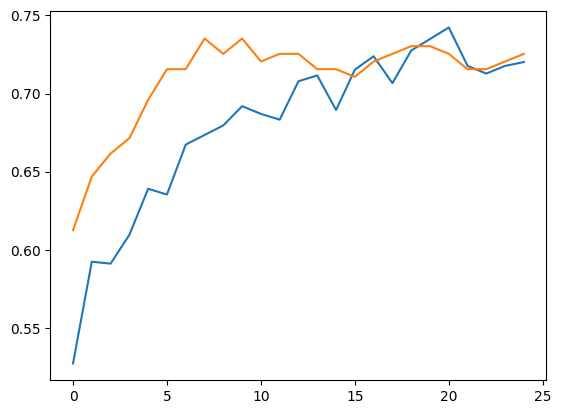

In [58]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

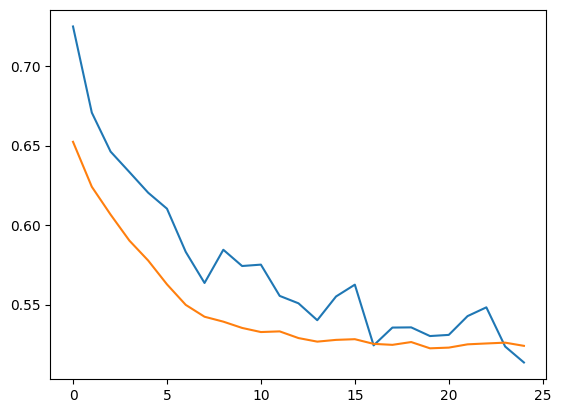

In [59]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [61]:
for i, layer in enumerate(model.layers):
    # Check if the layer has weights
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        print(f"Layer {i+1} - {layer.name} - Weights:")
        print(weights)
        print(f"Layer {i+1} - {layer.name} - Biases:")
        print(biases)
    else:
        print(f"Layer {i+1} - {layer.name} has no weights or biases.")

Layer 1 - dense_6 - Weights:
[[ 0.14944698 -0.04401051  0.16057065  0.16830179 -0.24250583 -0.32384175
   0.25695416 -0.16211537 -0.178822    0.22563495 -0.28449708]
 [ 0.43214178 -0.00814214 -0.22257264 -0.61356866 -0.05522883  0.280482
   0.48906186  0.34890503 -0.26072142  0.03667459  0.00645044]
 [ 0.21139126  0.02839376  0.18172754 -0.6579923  -0.14435342  0.12929577
   0.01680687  0.26150966 -0.12516184 -0.35818836  0.16710326]
 [ 0.03403688 -0.1799524   0.1036059   0.37309062 -0.08084639 -0.08460943
   0.11884379 -0.15385334  0.35163724  0.13678078 -0.22288959]
 [-0.18957575 -0.41863164 -0.20105639  0.00143585  0.07659365 -0.3096009
   0.1439989  -0.25074917  0.1514938   0.06600768 -0.05518223]
 [ 0.03513199  0.27909926  0.04877812  0.03200204 -0.3288468  -0.382128
   0.35449833 -0.0166449  -0.45143822 -0.08255128  0.35042045]
 [ 0.29650164 -0.27966124 -0.10783046 -0.539119    0.5440563  -0.53446686
   0.21048304 -0.3645408  -0.13340381  0.6529084  -0.53112364]
 [ 0.10456266 -0.

In [62]:
history_df=pd.DataFrame(hist.history)

In [63]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.527607,0.725008,0.612745,0.652408
1,0.592638,0.670787,0.647059,0.624117
2,0.591411,0.646247,0.661765,0.606597
3,0.609816,0.633386,0.671569,0.590239
4,0.639264,0.620372,0.696078,0.577693
5,0.635583,0.610325,0.715686,0.562708
6,0.667485,0.583121,0.715686,0.549774
7,0.673620,0.563561,0.735294,0.542308
8,0.679755,0.584465,0.725490,0.539217
9,0.692025,0.574236,0.735294,0.535262


In [64]:
y_pred=np.where(model.predict(X_test_std)>0.5,1,0)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [67]:
from sklearn.metrics import accuracy_score,RocCurveDisplay
print(accuracy_score(y_pred,y_test_enc))

0.6764705882352942


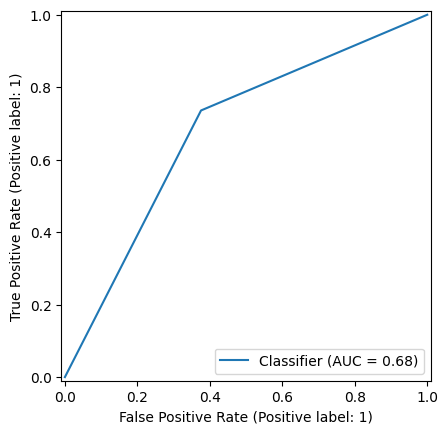

In [68]:
RocCurveDisplay.from_predictions(y_pred,y_test_enc)
plt.show()